In [1]:
import spacy

nlp = spacy.load("nl_core_news_md")
from util.conferences import get_conference_data, correct_cwd, get_sentences
from util.infections import get_infection_data
import datetime as dt
from tqdm.notebook import tqdm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
correct_cwd()

In [3]:
rutte_data, de_jonge_data = get_conference_data(include_journalist_questions=False)
rutte_texts = [content['text'] for content in rutte_data]
de_jonge_texts = [content['text'] for content in de_jonge_data]

In [4]:
rutte_sentences = [get_sentences(rutte_text) for rutte_text in rutte_texts]
date_strings = [content['date'] for content in rutte_data]
dates = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in date_strings]
de_jonge_sentences = [get_sentences(de_jonge_text) for de_jonge_text in de_jonge_texts]

In [5]:
def base_form(token_tags):
    required_tags = ['WW', 'ev', 'tgw']
    return all([required_position in token_tags for required_position in required_tags])

In [6]:
def has_imperative_mood(sentence: str):
    doc = nlp(sentence)
    subjects = [tok.dep_ for tok in doc if (tok.dep_ == 'nsubj')]
    verbs = [tok for tok in doc if base_form(tok.tag_)]
    forbidden_verbs = ['kijk', 'is', 'staat']
    imperative_verb = doc[0] in verbs and not (str(doc[0]).lower() in forbidden_verbs)
    if not subjects and imperative_verb and not '?' in sentence:
        return sentence
    return False

In [7]:
try:
    relative_proportions
except:
    relative_proportions = []

    for rut_doc, de_jonge_doc in tqdm(list(zip(rutte_sentences, de_jonge_sentences))):
        doc = rut_doc + de_jonge_doc
        count = 0
        for sentence in doc:
            if has_imperative_form(sentence):
                count += 1
                print(sentence)
        relative_proportions.append(count / len(doc))

  0%|          | 0/60 [00:00<?, ?it/s]

Doe dit, maak hier gebruik van deze aanwijzingen: handen wassen, in je elleboog niezen en gebruik maken van papieren zakdoekjes.
Blijf hoe dan ook thuis als je kucht, niest of neusverkouden bent.
Denk aan het niet kunnen bezoeken van opa of oma in het verpleeghuis op dit moment.
Blijf dus zo veel mogelijk thuis.
Denk in Europa bijvoorbeeld om Oostenrijk, Italië en Spanje, maar ook landen buiten Europa zoals Iran, Zuid-Korea en China.
Blijf op minimaal anderhalve meter afstand.
Ga niet met zijn allen naar de gebruikelijke hotspots toe.
Denk aan de stranden, de recreatiegebieden en dergelijke.
Doe het niet.
Blijf thuis, bleib zu Hause, rester à la maison.
Hou dus alsjeblieft vol.
Maak van die boodschappen geen uitje met kinderen en vrouw of man.
Doe dit voor elkaar en help elkaar.
Dank jullie wel.
Ga niet onnodig op pad.
Denk aan de kappers, denk op termijn misschien aan de sportscholen of aan de sauna’s.
Denk bijvoorbeeld aan de horeca en de terrassen.
Dank je wel.
Loop of fiets zoveel 

In [8]:
# from https://stackoverflow.com/questions/35906717/marking-specific-dates-when-visualizing-a-time-series
def date_labels(ax, label_list):
    for date_point, label, clr, y_pos in label_list:
        plt.axvline(x=date_point, color=clr, ymin=0, ymax=y_pos, linestyle='--')
        plt.text(date_point, y_pos * ax.get_ylim()[1], label,
                 horizontalalignment='center',
                 verticalalignment='center',
                 color=clr,
                 bbox=dict(facecolor='white', alpha=0.9))

In [9]:
# from https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
def two_lines(t1, data1, t2, data2, y_label1, ylabel2):
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(y_label1, color=color)
    ax1.plot(t1, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(ylabel2, color=color)  # we already handled the x-label with ax1
    ax2.plot(t2, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # date labels
    label_list = [
        (pd.to_datetime("2020-3-23"), 'Intelligent Lockdown', 'k', 1),
        (pd.to_datetime("2020-12-15"), "Hard lockdown", 'k', 0.7),
        (pd.to_datetime("2021-12-18"), "Hard lockdown", 'k', 0.7)
    ]

    date_labels(ax2, label_list)

    fig.tight_layout()  # otherwise the right y-l
    matplotlib.rcParams['figure.dpi'] = 300
    matplotlib.rcParams['figure.figsize'] = (12, 5)
    plt.savefig(f'output/imperative_usage/{y_label1}-{ylabel2}.png')
    plt.show()

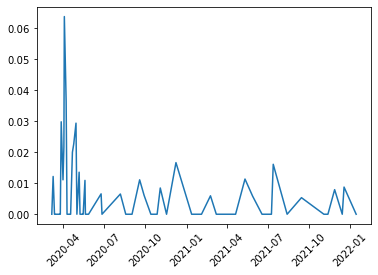

In [10]:
x = dates
y = relative_proportions
plt.plot(x, y)
plt.xticks(rotation=45)
plt.show()

In [11]:
infections = get_infection_data()
infections['new_infection_ma'] = infections['new_infections'].rolling(window=7, min_periods=1).mean()
infections['new_ic_admissions_ma'] = infections['new_ic_admissions'].rolling(window=7, min_periods=1).mean()
infections

,date,total_infections,new_ic_admissions,new_infections,new_infection_ma,new_ic_admissions_ma
0,2020-03-13,804,13,155,155.000000,13.000000
1,2020-03-14,959,21,155,155.000000,17.000000
2,2020-03-15,1135,28,176,162.000000,20.666667
3,2020-03-16,1413,33,278,191.000000,23.750000
4,2020-03-17,1705,35,292,211.200000,26.000000
...,...,...,...,...,...,...
689,2022-01-31,4432484,19,112227,68312.142857,12.571429
690,2022-02-01,4538279,15,105795,75688.571429,12.714286
691,2022-02-02,4605248,14,66969,76881.857143,13.428571
692,2022-02-03,4688119,13,82871,79498.428571,12.285714


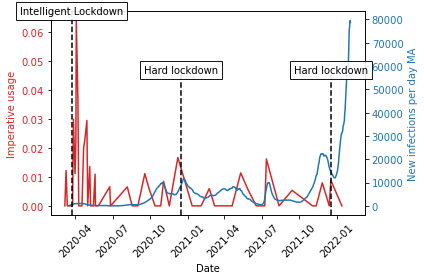

In [12]:
x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]
two_lines(x, y, x2, infections.new_infection_ma, 'Imperative usage', 'New infections per day MA')

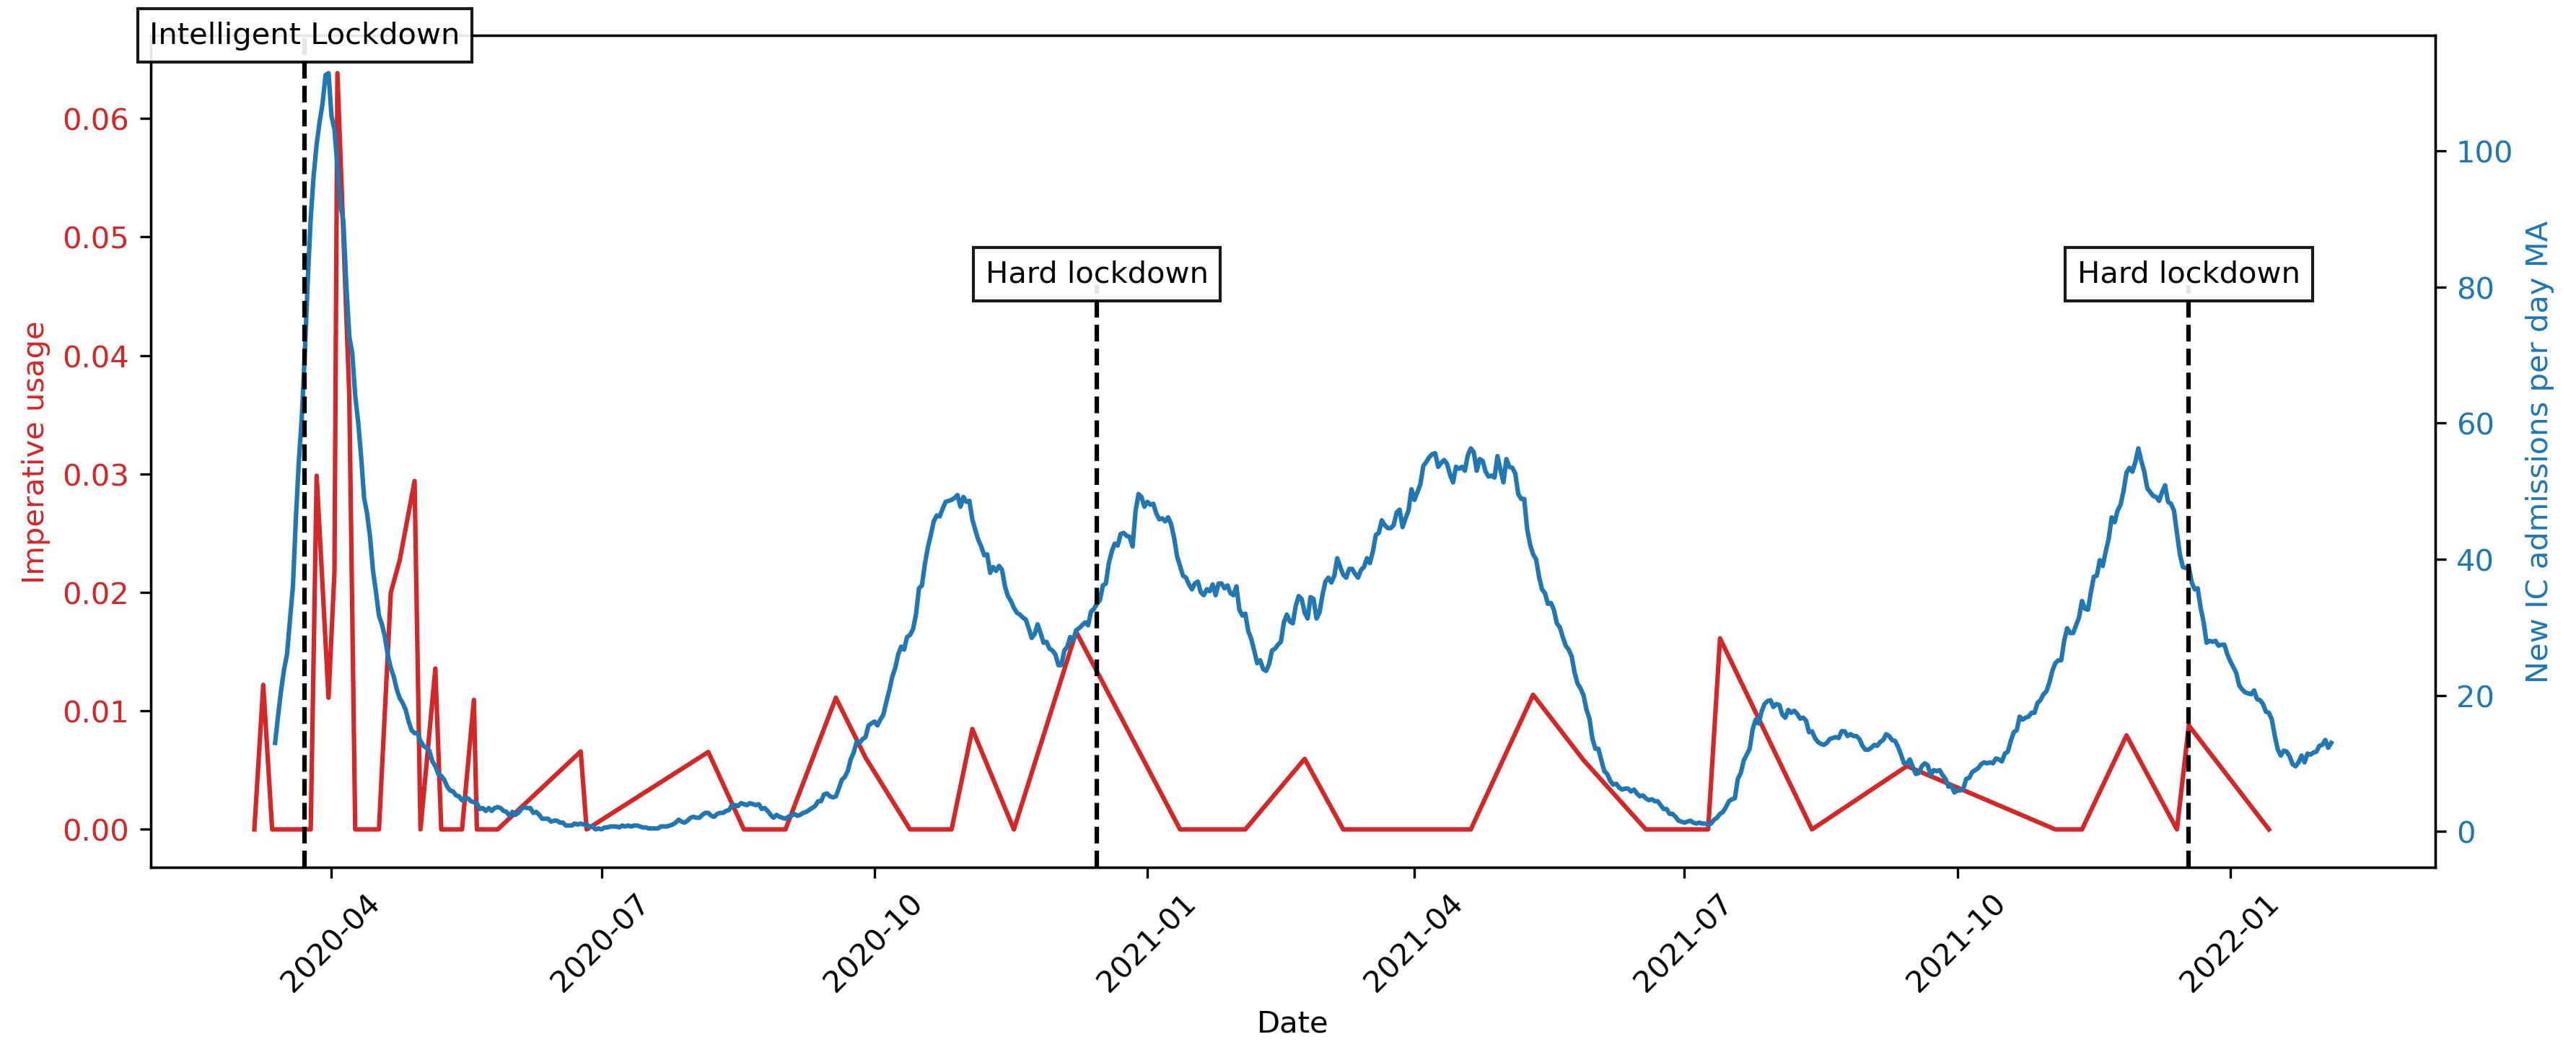

In [13]:
two_lines(x, y, x2, infections.new_ic_admissions_ma, 'Imperative usage', 'New IC admissions per day MA')

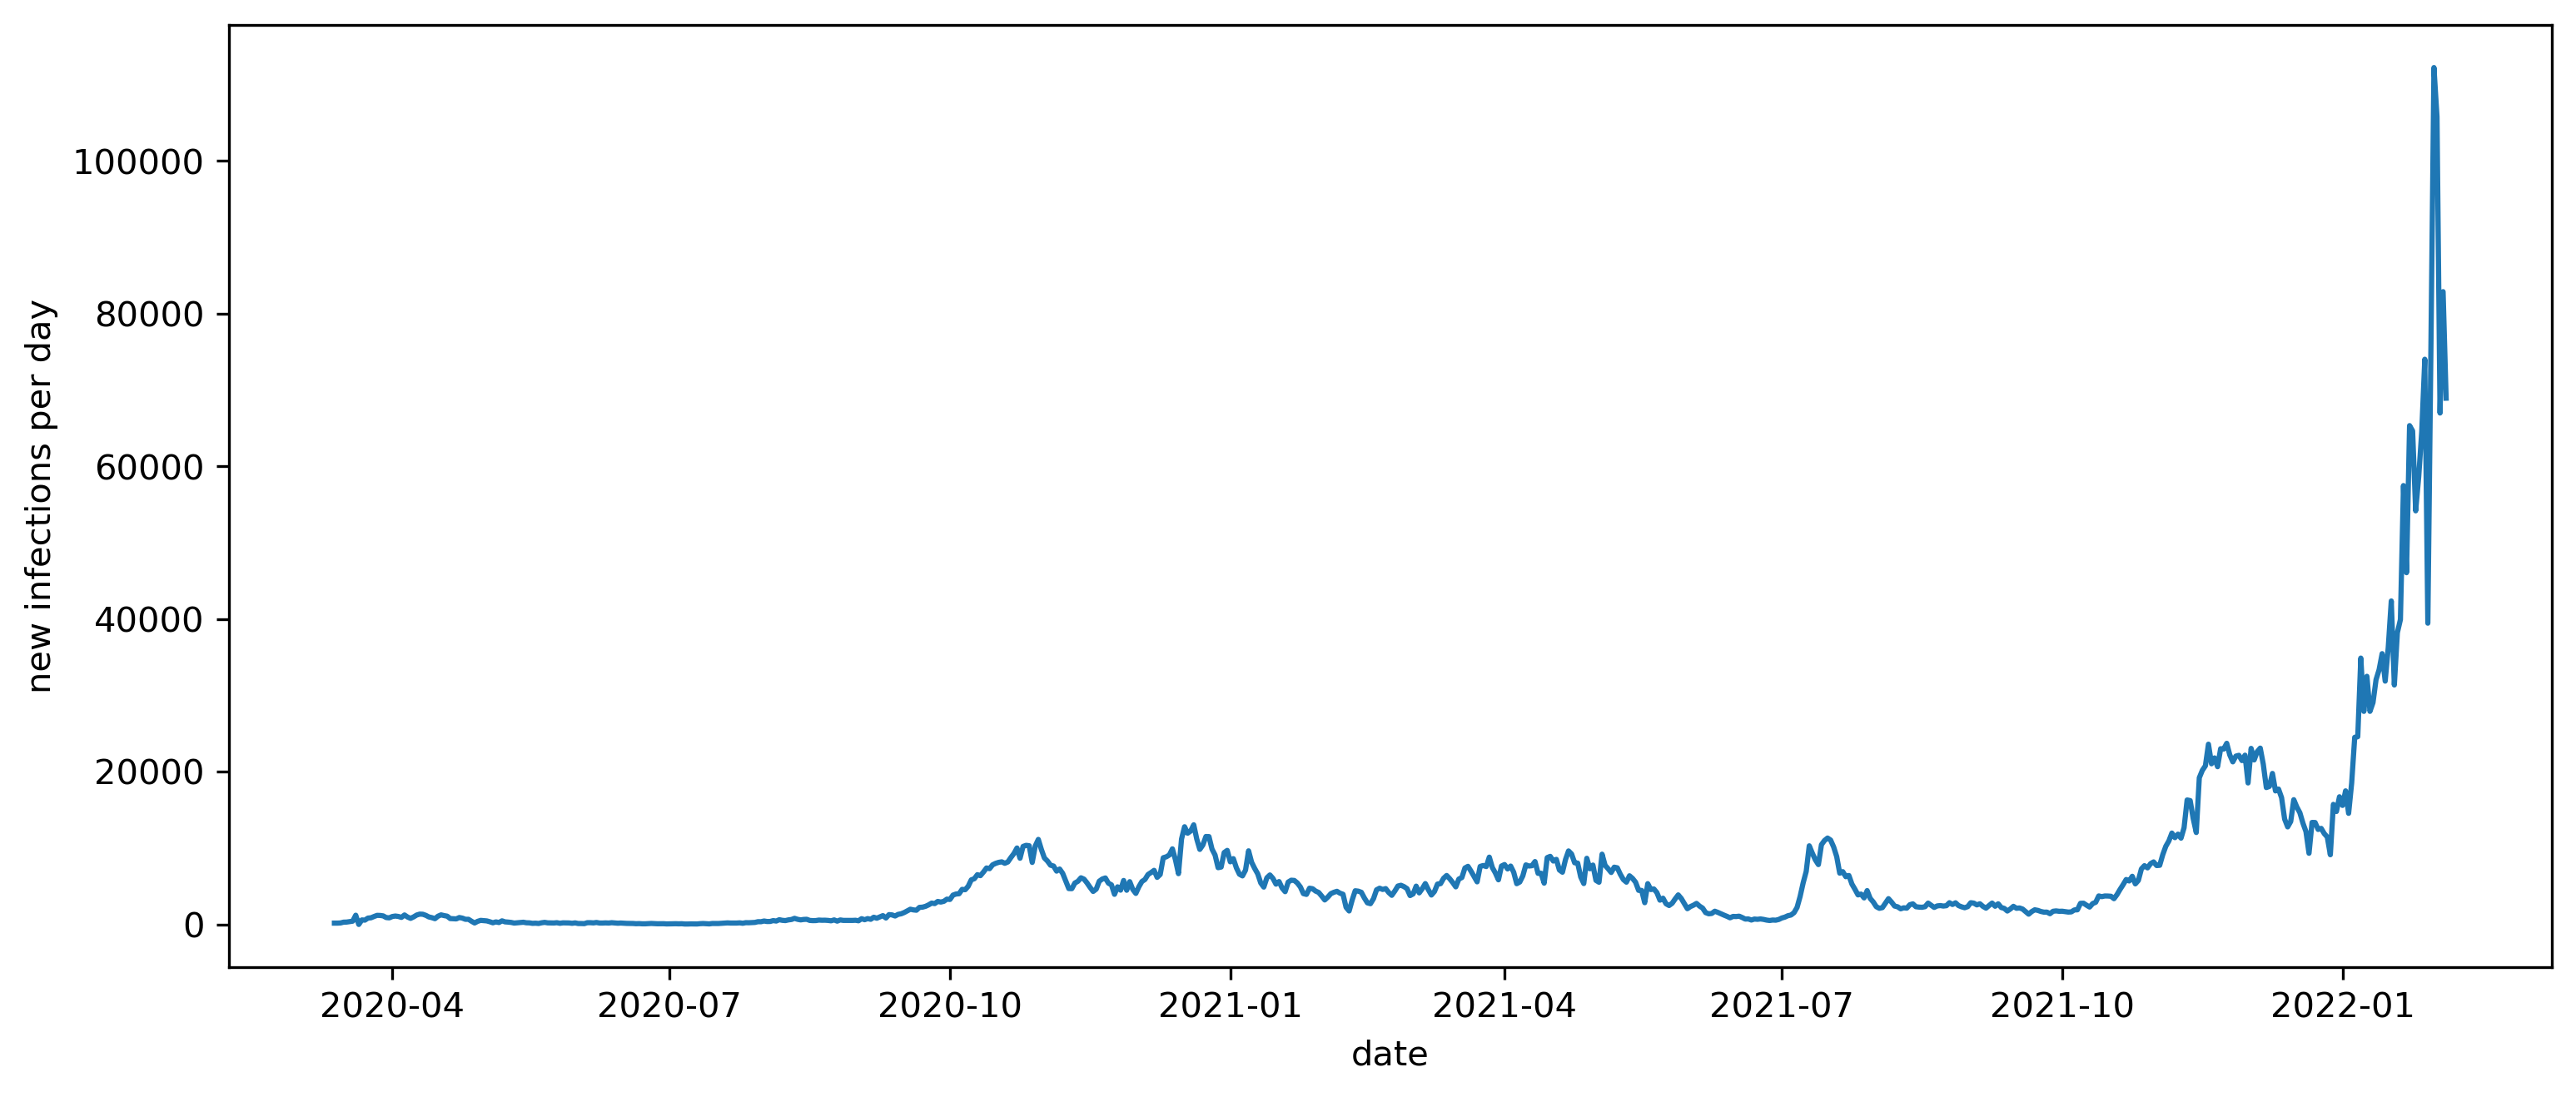

In [14]:
plt.plot(x2, infections.new_infections)
plt.xlabel('date')
matplotlib.rcParams['figure.dpi'] = 300
plt.ylabel('new infections per day')
plt.savefig('output/infections.png')
plt.show()